In [1]:
# My Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#Task 1: EDA

In [3]:
## First I am merging my two datasets from the two classes interviewed for this dataset. And then, I am taking a broad look at all of my data.
df1 = pd.read_csv('../data/raw/student-mat.csv')
df2 = pd.read_csv('../data/raw/student-por.csv')
df = pd.merge(df1,df2, how = "outer")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

(1044, 34)

In [4]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,276.949234,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,174.819941,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,131.000000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,261.500000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,392.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,649.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.shape

(1044, 34)

In [6]:
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.nunique(axis=0)

Unnamed: 0    649
school          2
sex             2
age             8
address         2
famsize         2
Pstatus         2
Medu            5
Fedu            5
Mjob            5
Fjob            5
reason          4
guardian        3
traveltime      4
studytime       4
failures        4
schoolsup       2
famsup          2
paid            2
activities      2
nursery         2
higher          2
internet        2
romantic        2
famrel          5
freetime        5
goout           5
Dalc            5
Walc            5
health          5
absences       35
G1             18
G2             17
G3             19
dtype: int64

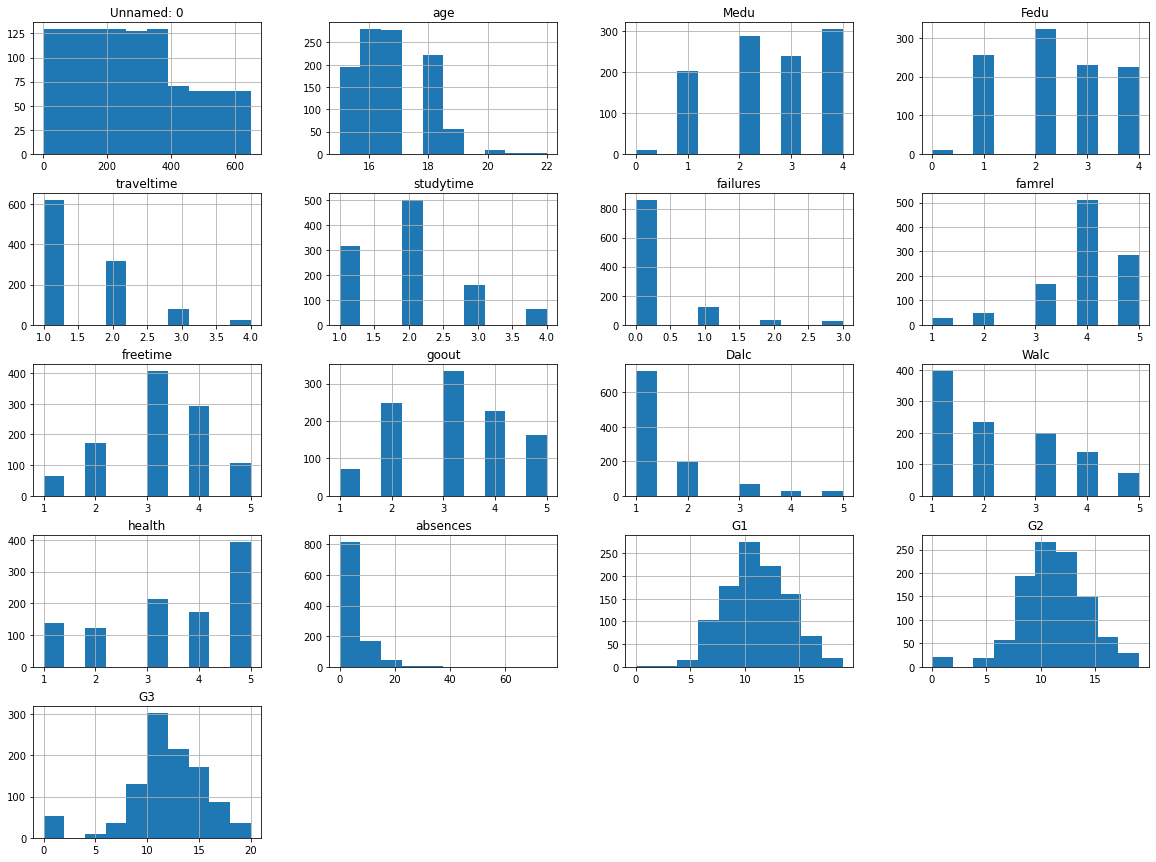

In [8]:
#Looking at histograms of all the numerical columns within my dataset.
##These visual representations helped me understand my data and helped me find outliers later in the EDA process.
hist = df.hist(bins=10,figsize =(20,15))

In [9]:
#Task 2: Data Analysis Pipeline

In [18]:
##I am ensuring that there are no duplicates from merging the math and portuguese class datasets

if len(df[df.duplicated()]) > 0:
    print("Number of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("Number duplicated entries found")

Number duplicated entries found


In [14]:
#I am removing the columns that are irrelevant to my research question:
cleandf = df.copy().drop(['school','sex', 'famsup', 'age', 'guardian', 'address', 'famsize', 'famrel', 'Dalc', 'Walc', 'freetime', 'G1', 'G2','goout', 'Mjob', 'Fjob', 'reason', 'romantic', 'internet', 'higher', 'nursery', 'activities', 'paid', 'absences', 'health', 'traveltime', 'studytime', 'failures', 'schoolsup'], axis=1).dropna(axis=0)

In [16]:
##Adding a new column containing the mean of Medu (maternal education) and Fedu (paternal education). 
### This new column = Parental Education (Pedu):

cleandf['Pedu'] = ((df.Medu.astype(int) + df.Fedu.astype(int))*(1/2))

In [17]:
# I am now renaming 2 columns:
## The first is "Unnamed: 0" which is being changes to "Student #" as the previous name says nothing about the column.
## The second is "G3", getting changed to Grade (Final grade).

cleandf = cleandf.rename(columns={'Unnamed: 0':'StudentNum'})
cleandf = cleandf.rename(columns={'G3':'Grade'})
cleandf

,StudentNum,Pstatus,Medu,Fedu,Grade,Pedu
0,1,A,4,4,6,4.0
1,2,T,1,1,6,1.0
2,3,T,1,1,10,1.0
3,4,T,4,2,15,3.0
4,5,T,3,3,10,3.0
...,...,...,...,...,...,...
1039,645,T,2,3,10,2.5
1040,646,T,3,1,16,2.0
1041,647,T,1,1,9,1.0
1042,648,T,3,1,10,2.0


In [31]:
#Task 3: Method Chaining

from .. import project_functions2.py # This is called a relative import
df = project_functions.load_and_process(url_or_path_to_csv_file)
df
import pandas as pd


def df(address):
    df1 = (
        pd.read_csv(address)
        .drop(columns = ['school','sex', 'famsup', 'age', 'guardian', 'address', 'famsize', 'famrel',
                         'Dalc', 'Walc', 'freetime', 'G1', 'G2','goout', 'Mjob', 'Fjob', 'reason', 'romantic',
                            'internet', 'higher', 'nursery', 'activities', 'paid', 'absences', 'health', 'traveltime',
                         'studytime', 'failures', 'schoolsup'])
        .rename(columns ={'Unnamed: 0':'StudentNum','G3':'Grade'})
        .dropna()
        .reset_index(drop=True)
        .assign(Pedu=lambda x: (x['Medu']*1/2) + (x['Fedu']*1/2)),
        ) 
    
    return df1

df("../data/raw/student-mat.csv")

(     StudentNum Pstatus  Medu  Fedu  Grade  Pedu
 0             1       A     4     4      6   4.0
 1             2       T     1     1      6   1.0
 2             3       T     1     1     10   1.0
 3             4       T     4     2     15   3.0
 4             5       T     3     3     10   3.0
 ..          ...     ...   ...   ...    ...   ...
 390         391       A     2     2      9   2.0
 391         392       T     3     1     16   2.0
 392         393       T     1     1      7   1.0
 393         394       T     3     2     10   2.5
 394         395       T     1     1      9   1.0
 
 [395 rows x 6 columns],)

In [35]:

from project_functions2.py import project_functions2 # This is called a relative import
df = project_functions.load_and_process(url_or_path_to_csv_file)
df

ModuleNotFoundError: No module named 'project_functions2'

In [39]:
from .. import project_functions2 # This is called a relative import
df = project_functions.load_and_process('notebooks/project_functions2')
df

ImportError: attempted relative import with no known parent package